     Feature  Importance  Standard Deviation
11        ca    0.067857            0.007607
2         cp    0.060714            0.013625
12      thal    0.033442            0.008473
9    oldpeak    0.024026            0.007846
0        age    0.018506            0.007411
7    thalach    0.016883            0.005586
1        sex    0.011688            0.003896
8      exang    0.009091            0.002430
4       chol    0.005195            0.005072
10     slope    0.004221            0.005245
3   trestbps   -0.000325            0.000974
5        fbs   -0.002597            0.002830
6    restecg   -0.002597            0.004307


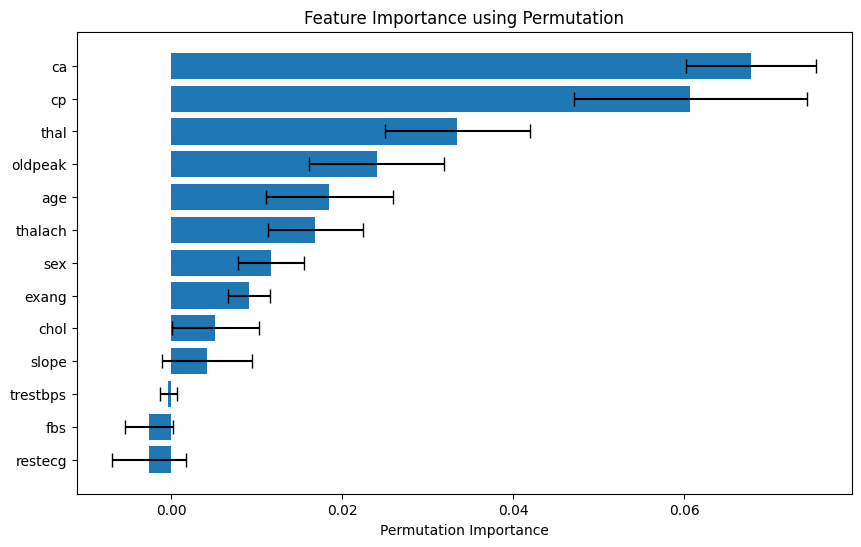

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart.csv")

# Feature selection and preprocessing
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance
results = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy"
)

# Get feature importances and their standard deviations
importance_means = results.importances_mean
importance_std = results.importances_std

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame(
    {
        "Feature": X.columns,
        "Importance": importance_means,
        "Standard Deviation": importance_std,
    }
).sort_values(by="Importance", ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    xerr=importance_df["Standard Deviation"],
    capsize=5,
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

     Feature  Importance
2         cp    0.132274
7    thalach    0.125039
11        ca    0.122912
9    oldpeak    0.122852
12      thal    0.113005
0        age    0.085554
4       chol    0.079872
3   trestbps    0.068356
10     slope    0.051335
8      exang    0.042210
1        sex    0.028721
6    restecg    0.018155
5        fbs    0.009714


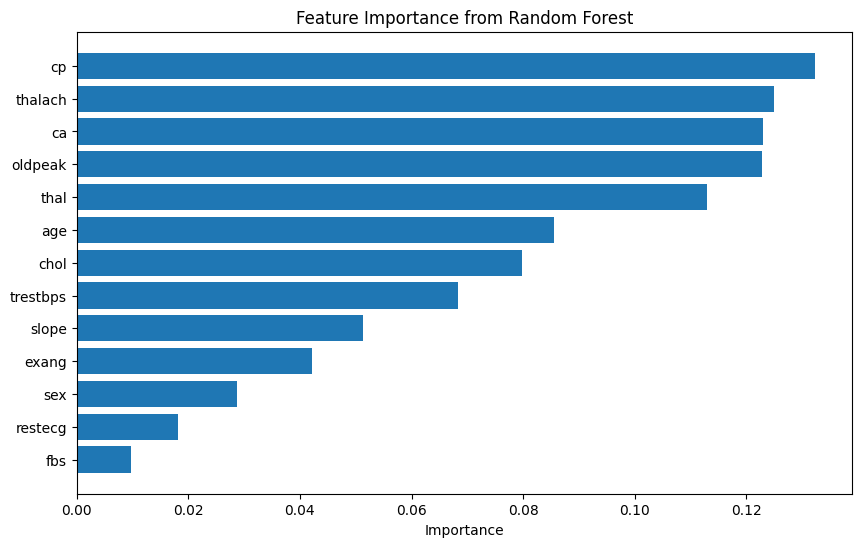

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart.csv")

# Feature selection and preprocessing
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importances from the model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": importances}
).sort_values(by="Importance", ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

     Feature  Ranking
7    thalach        1
0        age        2
2         cp        3
9    oldpeak        4
12      thal        5
11        ca        6
4       chol        7
3   trestbps        8
8      exang        9
10     slope       10
1        sex       11
6    restecg       12
5        fbs       13


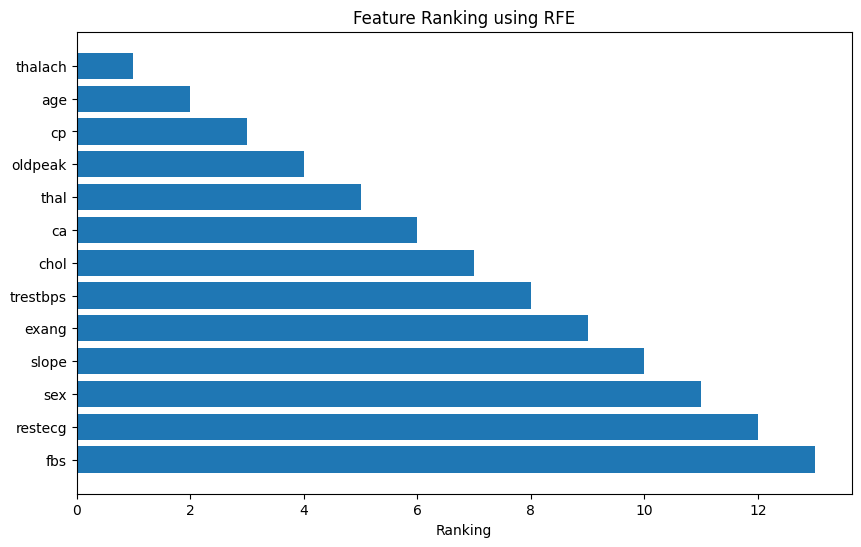

In [9]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart.csv")

# Feature selection and preprocessing
X = df.drop("target", axis=1)
y = df["target"]

# Initialize model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=1)

# Fit RFE
rfe = rfe.fit(X, y)

# Create a DataFrame for easier visualization
rfe_df = pd.DataFrame({"Feature": X.columns, "Ranking": rfe.ranking_}).sort_values(
    by="Ranking"
)

print(rfe_df)

# Plot RFE rankings
plt.figure(figsize=(10, 6))
plt.barh(rfe_df["Feature"], rfe_df["Ranking"])
plt.xlabel("Ranking")
plt.title("Feature Ranking using RFE")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()